## Image Classification using Neural Networks

In [1]:
# Importing the libraries

# Importing libraries used for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
# Importing maths and array libraries
import numpy as np
import pandas as pd
import math 
# Importing for computing the time 
import time

# Import random library
import random

# Importing for preprocessing and splitting the dataset
from sklearn.preprocessing import Normalizer , scale
from sklearn.model_selection import train_test_split
from sklearn import metrics

# importing Keras Libraries for model creation
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.models import Sequential, load_model
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler

#importing Keras 'cifar10' dataset library
from keras.datasets import cifar10

In [2]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
# Shape of the train and test dataset
print('Train dataset')
print('X = '+ str(X_train.shape) + ', y = '+ str(y_train.shape))
print('Test dataset')
print('X = '+ str(X_test.shape) + ', y = '+ str(y_test.shape))

Train dataset
X = (50000, 32, 32, 3), y = (50000, 1)
Test dataset
X = (10000, 32, 32, 3), y = (10000, 1)


In [4]:
# Randomly sample 20% of the training set
combine_train_set = list(zip(X_train, y_train))
# 20% of 50000 records of is 10000
random_train_set = random.sample(combine_train_set, 10000)

final_X_train = []
final_y_train = []
for xi,yi in random_train_set :
    final_X_train.append(xi)
    final_y_train.append(yi)
    
final_X_train = np.array(final_X_train)
final_y_train = np.array(final_y_train)

## **Preprocessing step**

Before creating a network and training the model, it is important to normalize the data. Therefore, we have used the Min-Max normalization technique as we have an image data. So, minimum value of the pixel is 0 , while maximum value of pixels is about 255 (for individual RBG layers)

In [5]:
# Normalize input images
#Dividing every value with 255 to make it mormalize between 0 and 1
X_train_norm = final_X_train.astype("float32")/255
X_test_norm = X_test.astype("float32")/255

We are using One Hot Encoding which will make the classification task easy

In [6]:
# One - hot encoding the labels to simplify the task
y_train_encoding = to_categorical(final_y_train, num_classes=10)
y_test_encoding = to_categorical(y_test, num_classes=10)

In [7]:
X_train_norm.shape

(10000, 32, 32, 3)

## **Part 1) MLP**

### a) Building a multi-layer perceptron (as per problem statement)


*   Fully connected layer with 512 units and a sigmoid activation function
*   Fully connected layer with 512 units and a sigmoid activation function
*   Output layer with the suitable activation function and number of neurons for the classification task


In [8]:
# Creating the MLP model
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))

In [9]:
# compiling the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 7s 18ms/step - loss: 2.1667 - accuracy: 0.2009 - val_loss: 1.8925 - val_accuracy: 0.3149
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8978 - accuracy: 0.3117 - val_loss: 1.8662 - val_accuracy: 0.3326
Epoch 3/5
313/313 [==============================] - 5s 17ms/step - loss: 1.8399 - accuracy: 0.3470 - val_loss: 1.8404 - val_accuracy: 0.3389
Epoch 4/5
313/313 [==============================] - 6s 19ms/step - loss: 1.8109 - accuracy: 0.3490 - val_loss: 1.7667 - val_accuracy: 0.3594
Epoch 5/5
313/313 [==============================] - 6s 18ms/step - loss: 1.7793 - accuracy: 0.3543 - val_loss: 1.7855 - val_accuracy: 0.3430


### Output layer
- In the output, the layer uses the number of units as per the number of classes in the dataset. Here we are using 10, as there are 10 different classes in the CIFAR-10 dataset.
- Apart from this, in the output we use SOFTMAX activation functions as it gives the probabilities of each class.
- Softmax function is always the prefered option when we are dealing with multi-class/ multi-label situations. 
- The reason why Softmax is prefered because it behaves similar to the max-output layer( Where the best prediction is if the probability is 1.0 for a single output node, and probability of rest of the output nodes is zero).  Due to this behavious and also since it is differentiable, this makes it an asset by perfroming gradient desecnt in multi-class problems.



### Loss function
- While compiling the model, we need to take into account the loss function depending on the dataset.
- Categorical Cross-Entropy is a default loss function used when a label or part can have multiple classes
- Cross-entropy tabulates a score that summarizes the average difference between the actual and predicted probability distributions for all the classes.
- It is imporant to know that, this works in conjunction with the softmax function defined previously, in order to predict the probability for each class.

### Plotting the training and validation accuracies of the MLP model

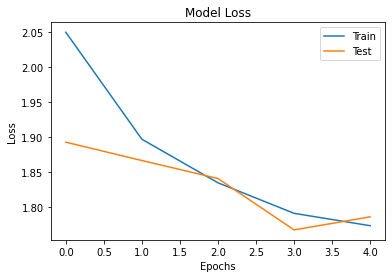

In [11]:
#Plot the MLP model loss
plt.plot(mlp_model.history['loss'])
plt.plot(mlp_model.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss")
plt.show()

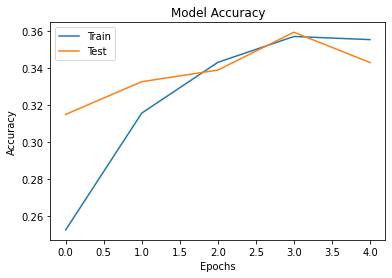

In [12]:
# Plot the MLP model accuracy
plt.plot(mlp_model.history['accuracy'])
plt.plot(mlp_model.history['val_accuracy'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy")
plt.show()

###  Comments on the above model :-


*   From the above plots, it can be seen that the model loss of both the training and validation data drops at the same rate.
*   In terms of the accuracy, the accuracy for both the sets keeps increaing at a steady rate.


# b) Increasing the number of layers in MLP model

**Creating the MLP model with 3 hidden layers**

In [13]:
# Creating the MLP model with 3 hidden layers 
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))

In [14]:
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [15]:
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 6s 19ms/step - loss: 2.2271 - accuracy: 0.1566 - val_loss: 1.9851 - val_accuracy: 0.2518
Epoch 2/5
313/313 [==============================] - 6s 20ms/step - loss: 1.9825 - accuracy: 0.2615 - val_loss: 1.9463 - val_accuracy: 0.2691
Epoch 3/5
313/313 [==============================] - 6s 20ms/step - loss: 1.8892 - accuracy: 0.3122 - val_loss: 1.8246 - val_accuracy: 0.3332
Epoch 4/5
313/313 [==============================] - 6s 20ms/step - loss: 1.8596 - accuracy: 0.3220 - val_loss: 1.8953 - val_accuracy: 0.3081 0s
Epoch 5/5
313/313 [==============================] - 6s 20ms/step - loss: 1.8261 - accuracy: 0.3377 - val_loss: 1.8258 - val_accuracy: 0.3363


**Creating the MLP model with 4 hidden layers**

In [16]:
# Creating the MLP model with 4 hidden layers 
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 8s 24ms/step - loss: 2.3208 - accuracy: 0.1229 - val_loss: 2.0537 - val_accuracy: 0.2190
Epoch 2/5
313/313 [==============================] - 7s 23ms/step - loss: 2.0372 - accuracy: 0.2271 - val_loss: 1.9847 - val_accuracy: 0.2321
Epoch 3/5
313/313 [==============================] - 8s 24ms/step - loss: 1.9679 - accuracy: 0.2696 - val_loss: 1.9570 - val_accuracy: 0.2814
Epoch 4/5
313/313 [==============================] - 7s 22ms/step - loss: 1.9163 - accuracy: 0.2923 - val_loss: 1.9041 - val_accuracy: 0.2885
Epoch 5/5
313/313 [==============================] - 7s 23ms/step - loss: 1.8830 - accuracy: 0.3123 - val_loss: 2.0584 - val_accuracy: 0.2393


**Creating the MLP model with 5 hidden layers**

In [17]:
# Creating the MLP model with 5 hidden layers 
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 8s 25ms/step - loss: 2.3460 - accuracy: 0.1220 - val_loss: 2.1414 - val_accuracy: 0.1774
Epoch 2/5
313/313 [==============================] - 8s 25ms/step - loss: 2.1122 - accuracy: 0.1712 - val_loss: 2.0978 - val_accuracy: 0.1603
Epoch 3/5
313/313 [==============================] - 7s 24ms/step - loss: 2.0951 - accuracy: 0.1742 - val_loss: 2.0399 - val_accuracy: 0.2031
Epoch 4/5
313/313 [==============================] - 8s 25ms/step - loss: 2.0702 - accuracy: 0.1860 - val_loss: 2.0559 - val_accuracy: 0.1942
Epoch 5/5
313/313 [==============================] - 8s 25ms/step - loss: 2.0637 - accuracy: 0.1858 - val_loss: 2.0608 - val_accuracy: 0.1982


**Creating the MLP model with 6 hidden layers**

In [18]:
# Creating the MLP model with 6 hidden layers 
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(512, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 9s 26ms/step - loss: 2.3389 - accuracy: 0.1102 - val_loss: 2.1471 - val_accuracy: 0.1555
Epoch 2/5
313/313 [==============================] - 8s 27ms/step - loss: 2.1329 - accuracy: 0.1700 - val_loss: 2.0735 - val_accuracy: 0.1911
Epoch 3/5
313/313 [==============================] - 8s 27ms/step - loss: 2.0841 - accuracy: 0.1797 - val_loss: 2.0508 - val_accuracy: 0.1909
Epoch 4/5
313/313 [==============================] - 9s 27ms/step - loss: 2.0937 - accuracy: 0.1901 - val_loss: 2.0862 - val_accuracy: 0.1816
Epoch 5/5
313/313 [==============================] - 9s 27ms/step - loss: 2.0798 - accuracy: 0.1858 - val_loss: 2.1096 - val_accuracy: 0.1860


### Comments on increasing the number of layers in MLP model :-
- We have increased the number hidden layers while keeping the same number of units i.e 512 to compare the performance of the model.

| Number of Hidden Layers | Train Accuracy | Validation Accuracy | Train Loss | Validation Loss
| :-: | :-: | :-: | :-: | :-: |
| 3 | 30% | 31% | 1.88 | 1.84 |
| 4 | 25% | 29% | 1.94 | 1.92 |
| 5 | 17% | 18% | 2.06 | 2.08 |
| 6 | 17% | 12% | 2.05 | 2.27 |

- From the above results we have seen that as the number of hidden layer increases, the training and validation accuracies of the model is kept decreasing over 5 epochs. the last model with 6 hidden layer performed the worst as compared to its previous respective models.
- We can conclude that, the number of dense layers keep increasing, the model kept being overfitting.

- Additonally, the rise in number of densely connected hidden layers can most probably lead to an exploding gradient too, therefore it essential to design an neural network, which isn't as densely connected as this one.  
- Therefore, if we want the model to learn well, it is essential that we train the model over small sets of hidden layers, over much larger epochs, as opposed to the one presented in the question.

### c) Increasing the number of neurons in MLP model with 2 hidden layer
We will observe if this provides any form of improvement improvement .
 
**i) MLP with two hidden layers (Initial model) each with 300 neurons**

In [19]:
# Creating the MLP model with 300 neurons in the hidden layer layers 
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(300, activation='sigmoid'))
mlp.add(Dense(300, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 4s 12ms/step - loss: 2.1608 - accuracy: 0.2106 - val_loss: 1.9163 - val_accuracy: 0.3030
Epoch 2/5
313/313 [==============================] - 3s 11ms/step - loss: 1.9197 - accuracy: 0.2951 - val_loss: 1.8499 - val_accuracy: 0.3369
Epoch 3/5
313/313 [==============================] - 3s 11ms/step - loss: 1.8335 - accuracy: 0.3337 - val_loss: 1.8510 - val_accuracy: 0.3346
Epoch 4/5
313/313 [==============================] - 3s 11ms/step - loss: 1.7895 - accuracy: 0.3558 - val_loss: 1.7965 - val_accuracy: 0.3576
Epoch 5/5
313/313 [==============================] - 3s 11ms/step - loss: 1.7667 - accuracy: 0.3742 - val_loss: 1.7710 - val_accuracy: 0.3508


**Creating the MLP model with 450 neurons in the hidden layer**

In [20]:
# Creating the MLP model with 450 neurons in the hidden layer  
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(450, activation='sigmoid'))
mlp.add(Dense(450, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 6s 16ms/step - loss: 2.1801 - accuracy: 0.1956 - val_loss: 1.9398 - val_accuracy: 0.2880
Epoch 2/5
313/313 [==============================] - 5s 17ms/step - loss: 1.9181 - accuracy: 0.3088 - val_loss: 1.8268 - val_accuracy: 0.3331
Epoch 3/5
313/313 [==============================] - 5s 14ms/step - loss: 1.8372 - accuracy: 0.3400 - val_loss: 1.8509 - val_accuracy: 0.3391
Epoch 4/5
313/313 [==============================] - 5s 16ms/step - loss: 1.7841 - accuracy: 0.3588 - val_loss: 1.8473 - val_accuracy: 0.3118
Epoch 5/5
313/313 [==============================] - 4s 14ms/step - loss: 1.7770 - accuracy: 0.3587 - val_loss: 1.8146 - val_accuracy: 0.3491


**Creating the MLP model with 1024 neurons in the hidden layer**

In [20]:
# Creating the MLP model with 1024 neurons in the hidden layer layers  
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(1024, activation='sigmoid'))
mlp.add(Dense(1024, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 15s 45ms/step - loss: 2.3032 - accuracy: 0.1664 - val_loss: 2.0043 - val_accuracy: 0.2537
Epoch 2/5
313/313 [==============================] - 14s 44ms/step - loss: 1.9523 - accuracy: 0.2792 - val_loss: 1.8639 - val_accuracy: 0.3194
Epoch 3/5
313/313 [==============================] - 14s 44ms/step - loss: 1.8937 - accuracy: 0.3014 - val_loss: 1.8469 - val_accuracy: 0.3297
Epoch 4/5
313/313 [==============================] - 14s 44ms/step - loss: 1.8311 - accuracy: 0.3287 - val_loss: 1.8611 - val_accuracy: 0.3323
Epoch 5/5
313/313 [==============================] - 14s 45ms/step - loss: 1.8040 - accuracy: 0.3377 - val_loss: 1.7900 - val_accuracy: 0.3525


**Creating the MLP model with 1536 neurons in the hidden layer**

In [21]:
# Creating the MLP model with 1536 neurons in the hidden layer  
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(1536, activation='sigmoid'))
mlp.add(Dense(1536, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 25s 78ms/step - loss: 2.3993 - accuracy: 0.1545 - val_loss: 1.9761 - val_accuracy: 0.2795
Epoch 2/5
313/313 [==============================] - 24s 77ms/step - loss: 1.9899 - accuracy: 0.2607 - val_loss: 1.9403 - val_accuracy: 0.2909
Epoch 3/5
313/313 [==============================] - 24s 77ms/step - loss: 1.8946 - accuracy: 0.3065 - val_loss: 1.8948 - val_accuracy: 0.3148
Epoch 4/5
313/313 [==============================] - 24s 78ms/step - loss: 1.8654 - accuracy: 0.3213 - val_loss: 1.9154 - val_accuracy: 0.2952
Epoch 5/5
313/313 [==============================] - 24s 77ms/step - loss: 1.8254 - accuracy: 0.3248 - val_loss: 1.7930 - val_accuracy: 0.3420


**Creating the MLP model with 2000 neurons in the hidden layer**

In [22]:
# Creating the MLP model with 2000 neurons in the hidden layer 
mlp = Sequential()
mlp.add(Flatten(input_shape = X_train_norm.shape[1:]))
mlp.add(Dense(2000, activation='sigmoid'))
mlp.add(Dense(2000, activation='sigmoid'))
mlp.add(Dense(10, activation='softmax'))
# compile the model
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# Trainging the model as per given problem statement parameters
mlp_model = mlp.fit(X_train_norm, y_train_encoding,validation_data = (X_test_norm, y_test_encoding), batch_size=32, epochs= 5)

Epoch 1/5
313/313 [==============================] - 34s 108ms/step - loss: 2.6056 - accuracy: 0.1445 - val_loss: 2.0803 - val_accuracy: 0.2143
Epoch 2/5
313/313 [==============================] - 33s 105ms/step - loss: 2.0296 - accuracy: 0.2554 - val_loss: 2.0208 - val_accuracy: 0.2735
Epoch 3/5
313/313 [==============================] - 33s 107ms/step - loss: 1.9608 - accuracy: 0.2839 - val_loss: 1.8987 - val_accuracy: 0.3067
Epoch 4/5
313/313 [==============================] - 33s 107ms/step - loss: 1.9076 - accuracy: 0.2965 - val_loss: 1.8462 - val_accuracy: 0.3295
Epoch 5/5
313/313 [==============================] - 34s 107ms/step - loss: 1.8654 - accuracy: 0.3188 - val_loss: 1.8861 - val_accuracy: 0.3221


### Comments on increasing the number of neurons in initial MLP model

| Number of neurons | Train Accuracy | Validation Accuracy | Train Loss | Validation Loss
| :-: | :-: | :-: | :-: | :-: |
| 300 | 35% | 36% | 1.78 | 1.75 |
| 450 | 35% | 35% | 1.79 | 1.78 |
| 1024 | 33% | 35% | 1.80 | 1.79 |
| 1536 | 32% | 34% | 1.82 | 1.79 |
| 2000 | 31% | 32% | 1.86 | 1.88 |

*   From the results of above models of varying the number of units within each hidden layer of the model, we can conclude that as the number of units  increases in each hidden layer, the accuracy started dropping, hinting towards the model being overfit.
*   We have seen that the MLP model with 300 neurons has the highest training and validation accuracy as compared to other models with increased neurons.
*   In conclusion, based on all the above resuls it is clearly evident that a proper trade-off needs to be performed in terms of the number of layers and number of units within them.


## **Part 2) CNN**

### a) Building a CNN as per problem statement


*   2D Convolutional layer with 64 filters (size of 3x3) and ReLU activ
ation function
*  2D Convolutional layer with 64 filters (size of 3x3) and ReLU activation function
*  Fully connected (Dense) layer with 512 units and a sigmoid activation function
*  Fully connected layer with 512 units and a sigmoid activation function
*  Output layer with the suitable activation function and number of neurons for the classification task



In [21]:
# Creating the CNN model
cnn = Sequential()
cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn.add(Flatten())
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dense(512, activation='sigmoid'))
cnn.add(Dense(10, activation='softmax'))

In [22]:
# compiling the model
cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
# For calculating the training time
start_time = time.time()

In [24]:
# Training the model as per problem statement
cnn_1_model = cnn.fit(X_train_norm, y_train_encoding, batch_size=32,validation_data = (X_test_norm, y_test_encoding), epochs= 5,shuffle=True)

Epoch 1/5
313/313 [==============================] - 137s 435ms/step - loss: 2.0866 - accuracy: 0.2440 - val_loss: 1.4942 - val_accuracy: 0.4585
Epoch 2/5
313/313 [==============================] - 133s 426ms/step - loss: 1.3780 - accuracy: 0.5071 - val_loss: 1.3653 - val_accuracy: 0.5026
Epoch 3/5
313/313 [==============================] - 133s 425ms/step - loss: 1.0033 - accuracy: 0.6439 - val_loss: 1.4002 - val_accuracy: 0.5073
Epoch 4/5
313/313 [==============================] - 133s 426ms/step - loss: 0.6067 - accuracy: 0.7921 - val_loss: 1.4359 - val_accuracy: 0.5427
Epoch 5/5
313/313 [==============================] - 133s 426ms/step - loss: 0.2323 - accuracy: 0.9394 - val_loss: 1.6526 - val_accuracy: 0.5373


In [25]:
end_time = time.time()
print('Total training time taken by CNN model is '+ str(end_time - start_time) + ' seconds')

Total training time taken by CNN model is 705.9546673297882 seconds


### Plotting the training and validation accuracies of the CNN1 model

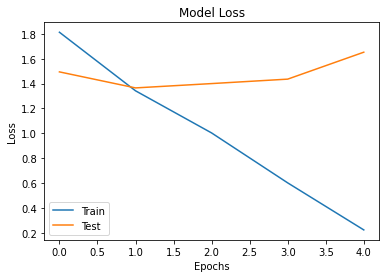

In [26]:
#Computing the model loss
plt.plot(cnn_1_model.history['loss'])
plt.plot(cnn_1_model.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss")
plt.show()

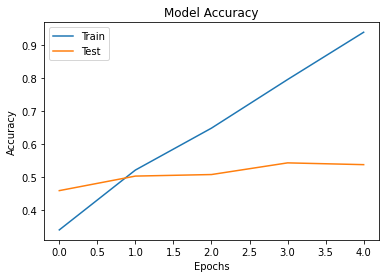

In [27]:
# Computing the model accuracy
plt.plot(cnn_1_model.history['accuracy'])
plt.plot(cnn_1_model.history['val_accuracy'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy")
plt.show()

### Comments on the above CNN1 model :-

- From the first plot of Model Loss of CNN1, we have seen that as number of epochs are increasing, the model loss of the training dataset decreasing at a constant rate, whereas the model loss of the validation set/test set intially decrerases, but then starts increasing
- Similarly, the model accuracy of the training dataset increases significantly to about 88.3%, whereas the model accuracy of the validation set/test set dataset stayed constant as epoch increases.
- It is computationally expensive because this model took around 15 mintues just to train of 5 epochs.
- Above result shows that CNN1 model requires a update in terms the type of connections, such as incorporating Max pooling layer to down sample and also incorporate several drop out layers in between the dense layers to generalize the model in best way possible. Which help us to train the model faster.

- Even though, if the model trained for more epoch it will not be useful as it's dense connection will prevent it from learning, as we have seen in above that it will have constant accuracy. So these number of epoch are good for this kind of a model.


## **Part 3) CNN2**

In [28]:
cnn2 = Sequential()
cnn2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu', input_shape=(32, 32, 3)))
cnn2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
cnn2.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu'))
cnn2.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
cnn2.add(Flatten())
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(512, activation='sigmoid'))
cnn2.add(Dropout(0.2))
cnn2.add(Dense(10, activation='softmax'))

In [29]:
# compile the model
cnn2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [30]:
# For calculating the training time
start_time = time.time()

In [31]:
cnn_2_model = cnn2.fit(X_train_norm, y_train_encoding, batch_size=32,validation_data = (X_test_norm, y_test_encoding), epochs= 5)

Epoch 1/5
313/313 [==============================] - 28s 88ms/step - loss: 2.1806 - accuracy: 0.2001 - val_loss: 1.5949 - val_accuracy: 0.4071
Epoch 2/5
313/313 [==============================] - 27s 87ms/step - loss: 1.5599 - accuracy: 0.4195 - val_loss: 1.4236 - val_accuracy: 0.4773
Epoch 3/5
313/313 [==============================] - 28s 89ms/step - loss: 1.3415 - accuracy: 0.5202 - val_loss: 1.2855 - val_accuracy: 0.5271
Epoch 4/5
313/313 [==============================] - 28s 89ms/step - loss: 1.1892 - accuracy: 0.5712 - val_loss: 1.1854 - val_accuracy: 0.5726
Epoch 5/5
313/313 [==============================] - 28s 91ms/step - loss: 1.0296 - accuracy: 0.6322 - val_loss: 1.2284 - val_accuracy: 0.5654


In [32]:
end_time = time.time()
print('Total training time taken by CNN model is '+ str(end_time - start_time) + ' seconds')

Total training time taken by CNN model is 149.95056009292603 seconds


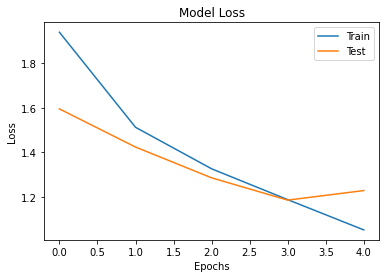

In [33]:
#Computing the model loss
plt.plot(cnn_2_model.history['loss'])
plt.plot(cnn_2_model.history['val_loss'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Model Loss")
plt.show()

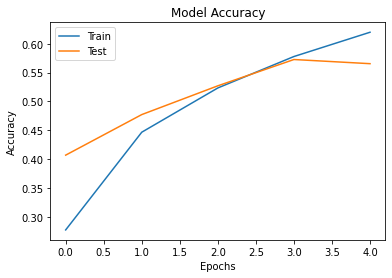

In [34]:
# Computing the model accuracy
plt.plot(cnn_2_model.history['accuracy'])
plt.plot(cnn_2_model.history['val_accuracy'])
plt.legend(['Train', 'Test'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Model Accuracy")
plt.show()

### Comments on the above CNN2 model:-

- From the first plot of Model Loss of CNN2, we have seen that as number of epochs are increasing, the model loss of the training dataset and testing dataset decreases at a similar rate.
- Whereas in second plot, accuracy increases at similar rates for both the training and the test datset.
- In comparison with CNN1, the validation accuracy has also improved.
- From above points we can say that adding max-pooling layers and drop-out layers help the model in being more tolerent towards translational invariance and helps in developing a more generalized model.
- In comparison with CNN1, this CNN2 model took only 4 - 5 minutes of the computational training time, so addition of max pooling and dropout layer helped in decreasing the computational time as well.
- From the above plot we can say that as number of epochs increases, will help the model to train much better and model accuracy will also increases. 


### **MLP Vs CNNs**

The comparison of performances for MLP and CNN models :

|  | Training Accuracy | Validation Accuracy | Training Loss | Validation Loss |
| --- | --- | --- | --- | --- |
| MLP | 34% | 34% | 1.78 | 1.81 |
| CNN1 | 94% | 54% | 0.22 | 1.60 |
| CNN2 | 61% | 60% | 1.07 | 1.11 |

The major differences in MLP and CNN models as per above analysis :
- CNN model has much more better accuracies on training dataset as compared to MLP model, keep the same number of epochs
- We know that CNN architecture uses  filters for image feature extraction, but MLP model only update the weights, so CNN is the best option when dealing with image datset.
- MLP models are not that much computational expensive as compared to CNN. It means MLP model trains faster than CNN. But this is not significant as CNN performs better in feature extraction.
- CNN2 model performed better than MLP and CNN1 model, because of dense structure of the MLP and CNN1 model as it prevents it to improve as we increase the number of epochs.

### **Recommendations to improve the network**

- We should increase the number of epochs for CNN2 model as we have seen it helps in increasing the accuracy. So we should keep atleast 50 epochs.
- Adamax optimizer  is good than Adam, So considering Adamax optimizer will help to improve the model.
- From above CNN2 model we have seen that adding max-pooling and drop layer helps to get better result. So we can increase the number of convolution layers as we have large datset with max-pooling and dropout layer.
- In the last few years, several different types of architectures have been proposed, the inception architecture is one such type of deep convlutional learning network, which can significantly improve the output.
- Additionally, finding the approporiate learning rate and momentum for the model can most certainly help. 

### References :
- https://towardsdatascience.com/deep-learning-with-cifar-10-image-classification-64ab92110d79
- https://www.tensorflow.org/tutorials/images/cnn
- https://datascience.stackexchange.com/questions/24459/how-to-give-cifar-10-as-an-input-to-mlp
- https://www.kaggle.com/guesejustin/object-recognition-mlp-cnn-efficientnet-on-cifar
- https://github.com/codebasics/deep-learning-keras-tf-tutorial/blob/master/16_cnn_cifar10_small_image_classification/cnn_cifar10_dataset.ipynb
- https://pvss.github.io/MLP+of+CIFAR-10
- https://github.com/vrakesh/CIFAR-10-Classifier/blob/master/cifar_classifier.py
- https://www.youtube.com/watch?v=7HPwo4wnJeA&ab_channel=codebasics
- https://github.com/vrakesh/CIFAR-10-Classifier
- https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
- https://appliedmachinelearning.blog/2018/03/24/achieving-90-accuracy-in-object-recognition-task-on-cifar-10-dataset-with-keras-convolutional-neural-networks/
- https://stats.stackexchange.com/questions/198463/how-to-increase-accuracy-of-all-cnn-c-on-cifar-10-test-set
- https://www.machinecurve.com/index.php/2020/02/09/how-to-build-a-convnet-for-cifar-10-and-cifar-100-classification-with-keras/
- https://www.kaggle.com/sid2412/cifar10-cnn-model-85-97-accuracy
- https://medium.com/@udolf15/building-a-image-classifier-using-cnn-with-cifar-10-dataset-5682afa4f51